<a href="https://colab.research.google.com/github/Birlinha/Pale_Blue_Dot_NASA/blob/main/precipitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install h5py pandas

In [15]:
import h5py
import pandas as pd
import numpy as np

# Substitua 'seuarquivo.h5' pelo caminho do seu arquivo HDF5
arquivo_hdf5 = h5py.File('3B-HHR-E.MS.MRG.3IMERG.20240106-S193000-E195959.1170.V06E.HDF5', 'r')


In [16]:
#arquivo_hdf5["Grid"].keys()

In [17]:

## Lista dos datasets
#datasets = ['nv', 'lonv', 'latv', 'time', 'lon', 'lat', 'time_bnds', 'lon_bnds', 'lat_bnds',
#            'precipitationCal', 'precipitationUncal', 'randomError', 'HQprecipitation',
#            'HQprecipSource', 'HQobservationTime', 'IRprecipitation', 'IRkalmanFilterWeight',
#            'probabilityLiquidPrecipitation', 'precipitationQualityIndex']
#
## Iterar sobre os datasets e exibir informações
#for dataset_name in datasets:
#    dataset = arquivo_hdf5.get("Grid")[dataset_name]
#
#    # Exibir informações
#    print(f"Dataset: {dataset_name}")
#    print(f"Shape: {dataset.shape}")
#    print(f"Tipo de Dado: {dataset.dtype}")
#    print(f"Dados:\n{dataset[:]}")  # Ajuste se desejar visualizar apenas uma parte dos dados
#    print("\n" + "="*50 + "\n")  # Separador

In [18]:
dataset_nv = arquivo_hdf5.get("Grid")["nv"]
dataset_lonv = arquivo_hdf5.get("Grid")["lonv"]
dataset_latv = arquivo_hdf5.get("Grid")["latv"]
dataset_time = arquivo_hdf5.get("Grid")["time"]
dataset_lon = arquivo_hdf5.get("Grid")["lon"]
dataset_lat = arquivo_hdf5.get("Grid")["lat"]
dataset_time_bnds = arquivo_hdf5.get("Grid")["time_bnds"]
dataset_lon_bnds = arquivo_hdf5.get("Grid")["lon_bnds"]
dataset_lat_bnds = arquivo_hdf5.get("Grid")["lat_bnds"]
dataset_precipitationCal = arquivo_hdf5.get("Grid")["precipitationCal"]
dataset_precipitationUncal = arquivo_hdf5.get("Grid")["precipitationUncal"]
dataset_randomError = arquivo_hdf5.get("Grid")["randomError"]
dataset_HQprecipitation = arquivo_hdf5.get("Grid")["HQprecipitation"]
dataset_HQprecipSource = arquivo_hdf5.get("Grid")["HQprecipSource"]
dataset_HQobservationTime = arquivo_hdf5.get("Grid")["HQobservationTime"]
dataset_IRprecipitation = arquivo_hdf5.get("Grid")["IRprecipitation"]
dataset_IRkalmanFilterWeight = arquivo_hdf5.get("Grid")["IRkalmanFilterWeight"]
dataset_probabilityLiquidPrecipitation = arquivo_hdf5.get("Grid")["probabilityLiquidPrecipitation"]
dataset_precipitationQualityIndex = arquivo_hdf5.get("Grid")["precipitationQualityIndex"]

In [19]:
from datetime import datetime

# Extract the value from the 1-element array
unix_timestamp = dataset_time[:][0]

# Convert UNIX timestamp to datetime
datetime_obj = datetime.utcfromtimestamp(unix_timestamp)

print(f"Shape: {dataset_time.shape}")
print(f"Type: {dataset_time.dtype}")
print(f"Data: {datetime_obj}")
print("=" * 50)


Shape: (1,)
Type: int32
Data: 2024-01-06 19:30:00


In [20]:
# Convert UNIX timestamp to datetime
dt0 = datetime.utcfromtimestamp(dataset_time_bnds[:][0][0])
dt1 = datetime.utcfromtimestamp(dataset_time_bnds[:][0][1])
print(dt0)
print(dt1)

2024-01-06 19:30:00
2024-01-06 20:00:00


In [21]:
# Clean invalid values (replace -9999.9 with NaN)
dataset_precipitationCal_cleaned = np.where(dataset_precipitationCal[:] == -9999.9, np.nan, dataset_precipitationCal[:])
display(dataset_precipitationCal_cleaned)

np.unique(dataset_precipitationCal_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

array([0.0000000e+00, 3.6976054e-15, 5.6858083e-14, ..., 6.2728424e+01,
       6.5629997e+01,           nan], dtype=float32)

In [22]:
#dataset_precipitationUncal[:]

# Clean invalid values (replace -9999.9 with NaN)
dataset_precipitationUncal_cleaned = np.where(dataset_precipitationUncal[:] == -9999.9, np.nan, dataset_precipitationUncal[:])
display(dataset_precipitationUncal_cleaned)

np.unique(dataset_precipitationUncal_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

array([0.0000000e+00, 3.6976054e-15, 5.6858083e-14, ..., 6.2728424e+01,
       6.5629997e+01,           nan], dtype=float32)

In [23]:
#dataset_randomError[:]

# Clean invalid values (replace -9999.9 with NaN)
dataset_randomError_cleaned = np.where(dataset_randomError[:] == -9999.9, np.nan, dataset_randomError[:])
display(dataset_randomError_cleaned)

np.unique(dataset_randomError_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

array([  0.23811762,   0.23811768,   0.2381179 , ..., 116.56748   ,
       120.57081   ,          nan], dtype=float32)

In [24]:
#dataset_HQprecipitation[:]

# Clean invalid values (replace -9999.9 with NaN)
dataset_HQprecipitation_cleaned = np.where(dataset_HQprecipitation[:] == -9999.9, np.nan, dataset_HQprecipitation[:])
display(dataset_HQprecipitation_cleaned)

np.unique(dataset_HQprecipitation_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 6.173e+01, 6.563e+01,
             nan], dtype=float32)

In [25]:
#dataset_HQobservationTime[:]

# Clean invalid values (replace -9999. with NaN)
dataset_HQobservationTime_cleaned = np.where(dataset_HQobservationTime[:] == -9999., np.nan, dataset_HQobservationTime[:])
display(dataset_HQobservationTime_cleaned)

np.unique(dataset_HQobservationTime_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., nan])

In [26]:
dataset_IRprecipitation[:]

# Clean invalid values (replace -9999.9 with NaN)
dataset_IRprecipitation_cleaned = np.where(dataset_IRprecipitation[:] == -9999.9, np.nan, dataset_IRprecipitation[:])
display(dataset_IRprecipitation_cleaned)

np.unique(dataset_IRprecipitation_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

array([0.0000000e+00, 3.9999999e-04, 7.9999998e-04, ..., 5.4975601e+01,
       5.5955196e+01,           nan], dtype=float32)

In [27]:
#dataset_IRkalmanFilterWeight[:]

# Clean invalid values (replace -9999.9 with NaN)
dataset_IRkalmanFilterWeight_cleaned = np.where(dataset_IRkalmanFilterWeight[:] == -9999, np.nan, dataset_IRkalmanFilterWeight[:])
display(dataset_IRkalmanFilterWeight_cleaned)

np.unique(dataset_IRkalmanFilterWeight_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.,  nan])

In [28]:
#dataset_precipitationQualityIndex[:]

# Clean invalid values (replace -9999.9 with NaN)
dataset_precipitationQualityIndex_cleaned = np.where(dataset_precipitationQualityIndex[:] == -9999.9, np.nan, dataset_precipitationQualityIndex[:])
display(dataset_precipitationQualityIndex_cleaned)

np.unique(dataset_precipitationQualityIndex_cleaned)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

array([9.99999975e-05, 3.33097950e-02, 4.90758531e-02, 5.11337966e-02,
       5.90021685e-02, 6.19294345e-02, 6.31431267e-02, 6.80129603e-02,
       7.34570697e-02, 7.47088119e-02, 7.51059800e-02, 8.60448927e-02,
       8.61332417e-02, 9.12264362e-02, 9.62006450e-02, 9.75267142e-02,
       9.83790085e-02, 1.02305681e-01, 1.04662925e-01, 1.08769730e-01,
       1.14208512e-01, 1.15489811e-01, 1.17288806e-01, 1.19006373e-01,
       1.20378613e-01, 1.25004336e-01, 1.32388830e-01, 1.32777736e-01,
       1.34493977e-01, 1.34534225e-01, 1.37560800e-01, 1.41873002e-01,
       1.43103346e-01, 1.43517971e-01, 1.43683016e-01, 1.43732667e-01,
       1.43861696e-01, 1.44255444e-01, 1.48023456e-01, 1.48269653e-01,
       1.48269683e-01, 1.48400754e-01, 1.48475230e-01, 1.53197408e-01,
       1.55595690e-01, 1.63365230e-01, 1.64436325e-01, 1.65170252e-01,
       1.65255055e-01, 1.65865496e-01, 1.66164443e-01, 1.66420624e-01,
       1.67685151e-01, 1.68190151e-01, 1.69157758e-01, 1.69545472e-01,
      

<ipython-input-45-12a5c3c40ff7>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset_precipitationQualityIndex_cleaned,dataset_precipitationQualityIndex_cleaned, cmap='Reds')


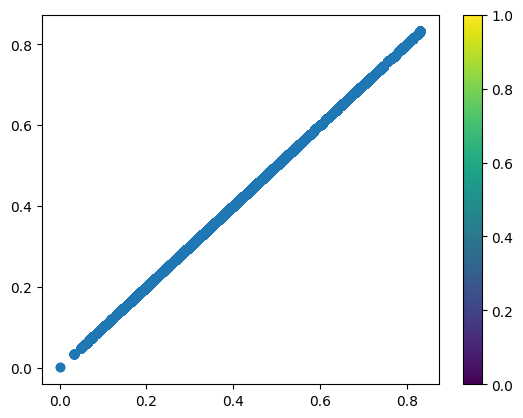

In [45]:
# prompt: make X,Y plot of dataset_precipitationQualityIndex_cleaned

import matplotlib.pyplot as plt
plt.scatter(dataset_precipitationQualityIndex_cleaned,dataset_precipitationQualityIndex_cleaned, cmap='Reds')
plt.colorbar()
plt.show()


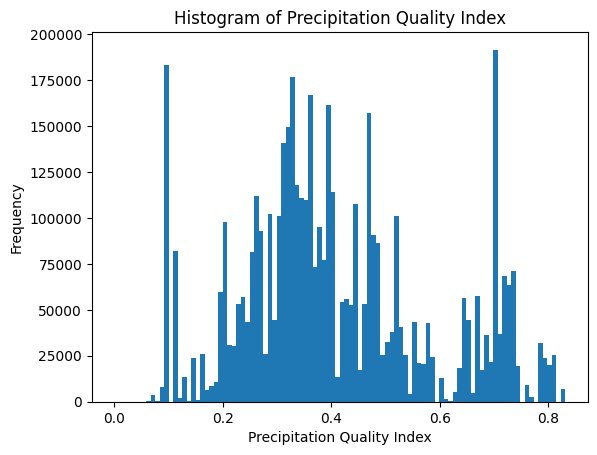

In [34]:
# prompt: create a graph of dataset_precipitationQualityIndex_cleaned

import matplotlib.pyplot as plt

dataset_precipitationQualityIndex_cleaned_rs = dataset_precipitationQualityIndex_cleaned.reshape(-1, 1)

plt.hist(dataset_precipitationQualityIndex_cleaned_rs, bins=100)
plt.xlabel("Precipitation Quality Index")
plt.ylabel("Frequency")
plt.title("Histogram of Precipitation Quality Index")
plt.show()
